In [48]:
#Load libraries
library(ggplot2)
library(dplyr)

In [108]:
#Load SPON Data
spon_sentiment_all <- na.omit(read.csv("/home/hao/workspace/6thSemester/DataScience/data/SPON_All.csv", fileEncoding="UTF-16"))
head(spon_sentiment_all)

X,year,month,day,positiv_abs,neutral_abs,negativ_abs,positiv_rel,neutral_rel,negativ_rel
1,2001,1,1,4,4,12,0.02015050,0.01856187,0.05886288
2,2001,1,2,35,103,135,0.01619442,0.04036150,0.05168048
3,2001,1,3,69,120,120,0.03148833,0.05794016,0.05850294
4,2001,1,4,26,49,93,0.01867812,0.03444513,0.06457513
5,2001,1,5,45,102,133,0.02115049,0.04602044,0.05967728
6,2001,1,8,42,100,100,0.02182266,0.05149365,0.05300146


In [109]:
#Load Junge Freiheit Data
jf_sentiment_all <- na.omit(read.csv("/home/hao/workspace/6thSemester/DataScience/data/JF_ALL.csv", fileEncoding="UTF-8"))
head(jf_sentiment_all)

X,year,month,day,positiv_abs,neutral_abs,negativ_abs,positiv_rel,neutral_rel,negativ_rel
1,1970,1,1,10,9,20,0.03125000,0.02812500,0.06250000
2,1997,6,13,58,102,156,0.02480397,0.04221135,0.07471271
3,1997,6,20,20,71,85,0.02234637,0.07932961,0.09497207
4,1997,6,27,12,22,54,0.01442308,0.02644231,0.06490385
5,1997,7,4,18,29,43,0.02803738,0.04517134,0.06697819
6,1997,9,5,12,47,44,0.01530612,0.05994898,0.05612245


In [110]:
#Load Bild Data
bild_sentiment_all <- na.omit(read.csv("/home/hao/workspace/6thSemester/DataScience/data/BILD_All.csv", fileEncoding="UTF-8"))
head(bild_sentiment_all)

X,year,month,day,positiv_abs,neutral_abs,negativ_abs,positiv_rel,neutral_rel,negativ_rel
1,2007,12,5,11,33,49,0.02427984,0.08271605,0.11234568
2,2007,12,7,9,16,6,0.04000000,0.07111111,0.02666667
3,2007,12,10,8,33,22,0.02718954,0.09923436,0.06162465
4,2007,12,12,3,5,5,0.02777778,0.04629630,0.04247182
5,2007,12,13,16,36,44,0.03212851,0.07228916,0.08835341
6,2007,12,25,16,14,10,0.06451613,0.05645161,0.04032258


In [111]:
#Defining Method to aggregate positive_abs, neutral_abs, negative_abs to one value called polarity
calc_polarity <- function(positiv, neutral, negativ) {
    sum <- positiv + neutral + negativ
    polarity <- (positiv - negativ) / sum;
    polarity
}

In [112]:
#Group SPON Data by Year
spon_sentiment_byYear <- spon_sentiment_all %>% 
  group_by(year) %>%
  summarise(sum_positiv_abs = sum(positiv_abs), 
            sum_neutral_abs = sum(neutral_abs), 
            sum_negativ_abs = sum(negativ_abs), 
            polarity = calc_polarity(sum_positiv_abs, sum_neutral_abs, sum_negativ_abs), 
            mean_positiv_rel = mean(positiv_rel), 
            mean_neutral_rel = mean(neutral_rel), 
            mean_negativ_rel = mean(negativ_rel), 
            source = "SPON")
head(spon_sentiment_byYear)

year,sum_positiv_abs,sum_neutral_abs,sum_negativ_abs,polarity,mean_positiv_rel,mean_neutral_rel,mean_negativ_rel,source
2001,17061,40026,45843,-0.2796269,0.02115669,0.04716468,0.06094070,SPON
2002,19963,46281,58506,-0.3089619,0.02051569,0.04581002,0.06203490,SPON
2003,20419,47891,58816,-0.3020389,0.02131570,0.04682980,0.06166580,SPON
2004,21964,50029,63053,-0.3042593,0.02132806,0.04596730,0.06173111,SPON
2005,28573,66727,86556,-0.3188402,0.02056620,0.04659478,0.06138549,SPON
2006,35739,82787,105757,-0.3121859,0.02047034,0.04780735,0.06207602,SPON


In [113]:
#Group JF Data by Year
jf_sentiment_byYear <- jf_sentiment_all %>% 
  group_by(year) %>%
  summarise(sum_positiv_abs = sum(positiv_abs), 
            sum_neutral_abs = sum(neutral_abs), 
            sum_negativ_abs = sum(negativ_abs), 
            polarity = calc_polarity(sum_positiv_abs, sum_neutral_abs, sum_negativ_abs), 
            mean_positiv_rel = mean(positiv_rel), 
            mean_neutral_rel = mean(neutral_rel), 
            mean_negativ_rel = mean(negativ_rel), 
            source = "JF")
#filter
jf_sentiment_byYear <- jf_sentiment_byYear[(jf_sentiment_byYear>=2001),]
head(jf_sentiment_byYear)

year,sum_positiv_abs,sum_neutral_abs,sum_negativ_abs,polarity,mean_positiv_rel,mean_neutral_rel,mean_negativ_rel,source
2001,603,1536,1755,-0.2958398,0.02429357,0.05444537,0.06530460,JF
2002,3046,7194,10130,-0.3477663,0.02155308,0.05030854,0.06907093,JF
2003,33078,80859,106913,-0.3343219,0.02091855,0.05123163,0.06888684,JF
2004,31223,76285,101556,-0.3364185,0.01930742,0.04937646,0.06833263,JF
2005,16484,39802,53293,-0.3359129,0.01934692,0.04911905,0.06956803,JF
2006,17769,43598,59105,-0.3431171,0.01941966,0.04299506,0.07025098,JF


In [117]:
#Group Bild Data by Year
bild_sentiment_byYear <- bild_sentiment_all %>% 
  group_by(year) %>%
  summarise(sum_positiv_abs = sum(positiv_abs), 
            sum_neutral_abs = sum(neutral_abs), 
            sum_negativ_abs = sum(negativ_abs), 
            polarity = calc_polarity(sum_positiv_abs, sum_neutral_abs, sum_negativ_abs), 
            mean_positiv_rel = mean(positiv_rel), 
            mean_neutral_rel = mean(neutral_rel), 
            mean_negativ_rel = mean(negativ_rel),
            source = "BILD")
bild_sentiment_byYear$year <- as.numeric(as.character(bild_sentiment_byYear$year))
head(bild_sentiment_byYear)

year,sum_positiv_abs,sum_neutral_abs,sum_negativ_abs,polarity,mean_positiv_rel,mean_neutral_rel,mean_negativ_rel,source
2007,99,221,216,-0.2182836,0.03458718,0.06759151,0.06364433,BILD
2008,954,2224,2537,-0.2769904,0.02646646,0.05608431,0.06326936,BILD
2009,5482,11663,12296,-0.2314459,0.02990795,0.05769247,0.06205002,BILD
2010,10082,22059,23749,-0.2445339,0.02778070,0.05836194,0.06338421,BILD
2011,13231,28312,32570,-0.2609394,0.02759603,0.05683045,0.06317456,BILD
2012,13203,28881,32248,-0.2562154,0.02705577,0.05768549,0.06348543,BILD


Warning message:
“Removed 67 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 67 rows containing missing values (geom_point).”

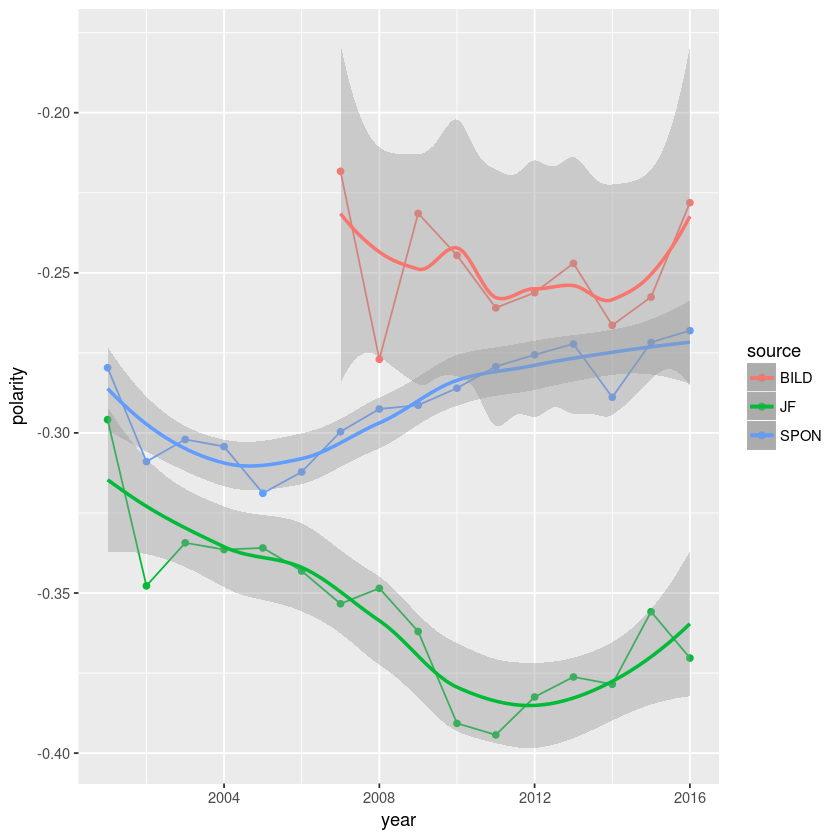

In [125]:
#Plotting Polarity of all three News Sites
ggplot() + 
#SPON
geom_line(data = spon_sentiment_byYear, aes(x=year, y=polarity, color = source)) + 
geom_point(data = spon_sentiment_byYear, aes(x=year, y=polarity, color = source)) +
geom_smooth(data = spon_sentiment_byYear, aes(x=year, y=polarity, color = source), method = 'loess') + 
#JF
geom_line(data = jf_sentiment_byYear, aes(x=year, y=polarity, color = source)) + 
geom_point(data = jf_sentiment_byYear, aes(x=year, y=polarity, color = source)) +
geom_smooth(data = jf_sentiment_byYear, aes(x=year, y=polarity, color = source), method = 'loess') + 
#BILD
geom_line(data = bild_sentiment_byYear, aes(x=year, y=polarity, color = source)) + 
geom_point(data = bild_sentiment_byYear, aes(x=year, y=polarity, color = source)) +
geom_smooth(data = bild_sentiment_byYear, aes(x=year, y=polarity, color = source), method = 'loess')
